<a href="https://colab.research.google.com/github/skj092/DLCVNLP/blob/main/Practical_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIM : Image Classification with Stanford Dogs Dataset

`The Stanford Dogs dataset contain images of 120 breeds of dogs from around the world. This dataset has been built using iage and annotation from ImageNet for the tast of fine-grained image categorization. Contents of this dataset:`



*   Number of categories: 120
*   Number of images: 20,580
*   Annotations: Class labels, Bounding boxes


**Dataset Link :-**: http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

**Annotations Link :-**  http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar

**Task:-**`Create a Web Application using Flask. Use the end user should be able
to upload an image and get results with the prediction score.`

In [1]:
## Downloading the datasets
!wget "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
!wget "http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar"

--2021-06-05 08:52:31--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  18.8MB/s    in 44s     

2021-06-05 08:53:16 (17.3 MB/s) - ‘images.tar’ saved [793579520/793579520]

--2021-06-05 08:53:16--  http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21852160 (21M) [application/x-tar]
Saving to: ‘annotation.tar’

annotation.tar      100%[===================>]  20.84M  7.67MB/s    in 2.7s    

2021-06-05 08:53:19 (7.67 MB/s) - ‘annotat

In [ ]:
# Extracting data
! tar -xvf images.tar
! tar -xvf annotation.tar

In [1]:
# Importing the necessary libraries
# !pip install fastai --upgrade -q
from fastai.vision.all import *

In [2]:
# setting directory structure
path = Path('.')
Path.BASE_PATH = path
path.ls()

(#6) [Path('.config'),Path('images.tar'),Path('Images'),Path('Annotation'),Path('annotation.tar'),Path('sample_data')]

In [3]:
(path/'Images').ls()

(#120) [Path('Images/n02106030-collie'),Path('Images/n02102318-cocker_spaniel'),Path('Images/n02097474-Tibetan_terrier'),Path('Images/n02108551-Tibetan_mastiff'),Path('Images/n02115913-dhole'),Path('Images/n02113186-Cardigan'),Path('Images/n02109047-Great_Dane'),Path('Images/n02096177-cairn'),Path('Images/n02110806-basenji'),Path('Images/n02107574-Greater_Swiss_Mountain_dog')...]

In [4]:
images = get_image_files(path/'Images')
print(images[0])
len(images)

Images/n02106030-collie/n02106030_7977.jpg


20580

In [5]:
def label_func(x):
  return x.parent.name[10:]
label_func(images[0])

'collie'

## DataBlock and DataLoaders

In [6]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = label_func,
    item_tfms = Resize(224))

In [7]:
ds = dblock.datasets(path/"Images")
dls = dblock.dataloaders(path/'Images')

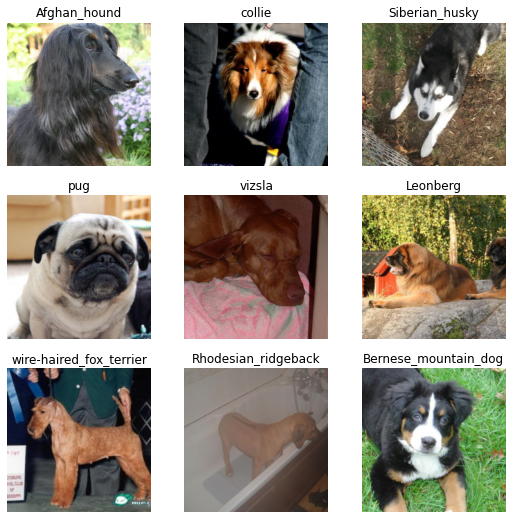

In [8]:
dls.show_batch()

In [9]:
# Number of classes
dls.c

120

In [10]:
# one batch of data
xb, yb = dls.one_batch()
xb.shape, yb.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

# Model

In [15]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [16]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.811538,0.943388,0.719145,02:35


epoch,train_loss,valid_loss,accuracy,time
0,1.088322,0.704627,0.788387,02:46


In [17]:
import torchvision.models as models
model = models.resnet18()
model.last_linear = nn.Sequential(nn.Linear(512,dls.c))

In [18]:
learn = Learner(dls, model, metrics=accuracy)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,4.258797,4.124521,0.065598,02:46


In [19]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  